# HR ANALYTICS WITH PYTHON: Data Understanding and Preprocessing

## Introduction

This notebook provides an exploratory data analysis (EDA) and data cleaning workflow for multiple HR datasets, including employee, recruitment, training, and engagement data. We will explore each dataset to find important patterns, check for missing or inconsistent values, and clean the data to prepare it for further HR analytics. Visualizations and summary tables will be used to highlight key trends and support data-driven decision making.


### TABLE OF CONTENTS
- [Dataset](#datasets)
- [Clean Column Names](#clean-column-names)
- [Employee Data](#employee-data)
- [Recruitment Data](#recruitment-data)
- [Engagement Data](#engagement-data)

In [44]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import missingno as msno
import warnings
from datetime import datetime
import spacy

# !python -m spacy download en_core_web_sm

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### Dataset

In [45]:
# Load datasets 

data_files = {
    "employee_df": "data/employee_data.csv",
    "engagement_df": "data/employee_engagement_survey_data.csv",
    "recruit_df": "data/recruitment_data.csv",
    "training_df": "data/training_and_development_data.csv",
}

def load_datasets(file_dict):
    datasets = {}
    for key, file_path in file_dict.items():
        datasets[key] = pd.read_csv(file_path)
    return datasets

datasets = load_datasets(data_files)

employee_df = datasets["employee_df"] = datasets["employee_df"]
engagement_df = datasets["engagement_df"]
recruit_df = datasets["recruit_df"]
training_df = datasets["training_df"]

### Clean Column Names

In [46]:
# Clean column names 

def clean_column_names(df):
    df.columns = df.columns.str.strip().str.replace(' ', '').str.replace('(', '').str.replace(')', '').str.replace('-', '').str.replace('_','')
    return df

employee_df = clean_column_names(employee_df)
engagement_df = clean_column_names(engagement_df)
recruit_df = clean_column_names(recruit_df)
training_df = clean_column_names(training_df)

In [47]:
employee_df.head()

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,TerminationDescription,DepartmentType,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,PerformanceScore,CurrentEmployeeRating
0,3427,Uriah,Bridges,20-Sep-19,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,Contract,Zone C,Temporary,Unk,NaN,Production,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,11-Feb-23,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,Contract,Zone A,Part-Time,Unk,NaN,Production,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,10-Dec-18,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,Full-Time,Zone B,Part-Time,Unk,NaN,Sales,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,21-Jun-21,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,Contract,Zone A,Full-Time,Unk,NaN,Sales,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,29-Jun-19,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,Contract,Zone A,Temporary,Unk,NaN,Sales,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3


In [48]:
engagement_df.head()

,EmployeeID,SurveyDate,EngagementScore,SatisfactionScore,WorkLifeBalanceScore
0,1001,10-10-2022,2,5,5
1,1002,03-08-2023,4,5,3
2,1003,03-01-2023,2,5,2
3,1004,30-07-2023,3,5,3
4,1005,19-06-2023,2,4,5


In [49]:
recruit_df.head()

,ApplicantID,ApplicationDate,FirstName,LastName,Gender,DateofBirth,PhoneNumber,Email,Address,City,State,ZipCode,Country,EducationLevel,YearsofExperience,DesiredSalary,JobTitle,Status
0,1001,03-Jun-23,Scott,Sheppard,Male,31-08-1992,421-429-7655x39421,perezjanet@example.org,597 Smith Point,Hollandfort,NV,57588,Micronesia,High School,8,60103.21,Chief Technology Officer,Interviewing
1,1002,15-May-23,Stanley,Lewis,Male,29-04-1965,+1-451-574-5308x1681,grossmark@example.com,8116 Stuart Loop,Port Margaretfurt,TN,14726,Greenland,Bachelor's Degree,17,64575.84,"Designer, furniture",Rejected
2,1003,04-Aug-23,Javier,Li,Female,10-03-1973,(858)901-5499,katiemaldonado@example.com,5940 Barr Villages Suite 075,Dianaland,TX,4699,China,PhD,20,39422.71,"Sound technician, broadcasting/film/video",Rejected
3,1004,28-Jul-23,Christopher,Johnston,Other,04-04-2001,(853)681-1839x2010,sheila73@example.com,442 Lewis Mount,Youngfurt,GA,34455,Ghana,High School,8,51045.11,Air cabin crew,Rejected
4,1005,05-Jun-23,Melissa,Hicks,Other,17-06-1978,364-575-8478x67812,emilypatterson@example.org,95961 Taylor Circles Apt. 169,East Ashleyborough,IN,21014,Solomon Islands,Master's Degree,0,52792.86,Art therapist,Interviewing


In [50]:
training_df.head()

,EmployeeID,TrainingDate,TrainingProgramName,TrainingType,TrainingOutcome,Location,Trainer,TrainingDurationDays,TrainingCost
0,1001,21-Sep-22,Customer Service,Internal,Failed,Port Greg,Amanda Daniels,4,510.83
1,1002,19-Jul-23,Leadership Development,Internal,Failed,Brandonview,Brittany Chambers,2,582.37
2,1003,24-Feb-23,Technical Skills,Internal,Incomplete,Port Briannahaven,Mark Roberson,4,777.06
3,1004,12-Jan-23,Customer Service,Internal,Completed,Knightborough,Richard Fisher,2,824.30
4,1005,12-May-23,Communication Skills,External,Passed,Bruceshire,Heather Shaffer,4,145.99


## Employee Data

In [51]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EmpID                       3000 non-null   int64 
 1   FirstName                   3000 non-null   object
 2   LastName                    3000 non-null   object
 3   StartDate                   3000 non-null   object
 4   ExitDate                    1533 non-null   object
 5   Title                       3000 non-null   object
 6   Supervisor                  3000 non-null   object
 7   ADEmail                     3000 non-null   object
 8   BusinessUnit                3000 non-null   object
 9   EmployeeStatus              3000 non-null   object
 10  EmployeeType                3000 non-null   object
 11  PayZone                     3000 non-null   object
 12  EmployeeClassificationType  3000 non-null   object
 13  TerminationType             3000 non-null   obje

### Checking Duplicated and Missing Data

Checking missing data is an essential step in data analysis, as missing values—caused by issues like data entry errors, incomplete records, or system limitations—can lead to biased results or incorrect conclusions if not addressed. In this step, I examine patterns of missingness in the employee dataset using visualizations and determine whether the missingness is random or systematic, which will inform the appropriate cleaning and imputation strategies in the next phase.

In [52]:
# Check for duplicate EmpID values in employee_df
dup_empid = employee_df[employee_df.duplicated('EmpID', keep=False)]
print(f"Number of duplicated EmpID rows: {len(dup_empid)}")

Number of duplicated EmpID rows: 0


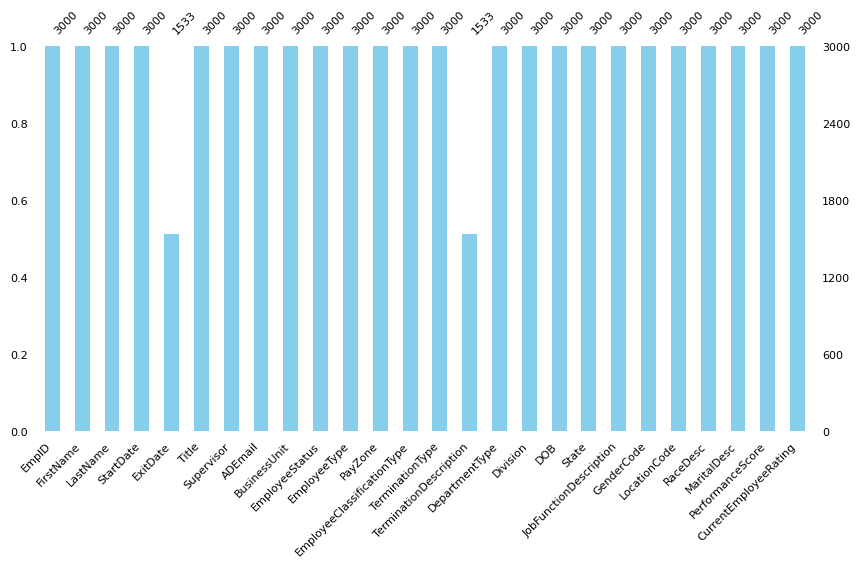

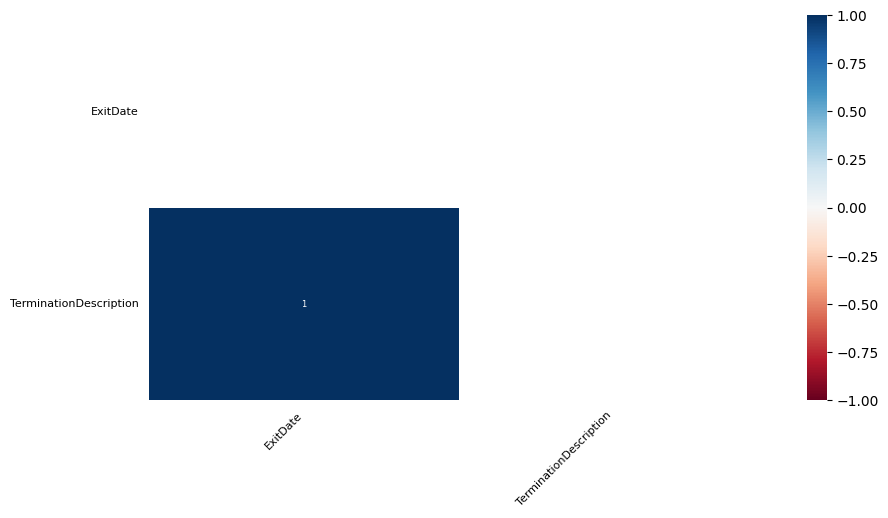

In [53]:
# Visualizing missing data
msno.bar(employee_df, color='skyblue', figsize=(10, 5), fontsize=8)
msno.heatmap(employee_df, figsize=(10, 5), fontsize=8)
plt.show()

### Visualization of Raw Data

The danger of trusting your data too much is that it can lead to misguided decisions if the data is incomplete, inaccurate, or misinterpreted. Always validate your data, understand its limitations, and combine insights with domain knowledge before taking action.

I visualized the relationship between job titles and termination types using a crosstab of Title vs TerminationType from the raw data. This revealed potential issues, such as entries like 'Unk' that are unclear, and Sankey diagrams mapping DepartmentType, EmployeeStatus, and TerminationType showed unexpected flows, such as active employees linked to termination types or illogical department-term outcomes.

A closer inspection of the last 30 records for EmployeeStatus, TerminationType, and TerminationDescription confirmed several inconsistencies, including active employees with termination information and mismatched or unclear statuses. Investigating the distribution of EmployeeStatus by ExitYear further highlighted patterns and potential data quality issues. To address this, in the cleaned dataset I set EmployeeStatus to 'Inactive' when ExitDate is not missing, keeping the original status otherwise, ensuring a more accurate analysis of terminations.

I also reviewed unique values for each column to understand the structure, identify categories, and detect anomalies, finding some entries—such as dates and divisions—that required adjustment. Finally, examining the relationship between EmployeeType and EmployeeClassificationType using a cross-tabulation and heatmap revealed inconsistencies, indicating potential data entry or categorization errors that should be corrected.

In [54]:
# Crosstab of Title vs TerminationType

ct_pos_term = pd.crosstab(employee_df['Title'], employee_df['TerminationType'])

fig = px.imshow(
    ct_pos_term.values,
    x=ct_pos_term.columns,
    y=ct_pos_term.index,
    text_auto=True,
    color_continuous_scale='YlGnBu',
    aspect="auto"
)
fig.update_layout(
    title="Employee Termination Count by Title",
    xaxis_title="Termination Type",
    yaxis_title="Job Title"
)
fig.show()

In [55]:
# Senkey 

df = employee_df.copy()
source_labels = df['DepartmentType'].unique().tolist()
middle_labels = df['EmployeeStatus'].unique().tolist()
target_labels = df['TerminationType'].unique().tolist()
labels = source_labels + middle_labels + target_labels

# DepartmentType -> EmployeeStatus
flow1 = df.groupby(['DepartmentType', 'EmployeeStatus']).size().reset_index(name='count')
flow1_sources = flow1['DepartmentType'].apply(lambda x: labels.index(x))
flow1_targets = flow1['EmployeeStatus'].apply(lambda x: labels.index(x))
flow1_values = flow1['count']

# EmployeeStatus -> TerminationType
flow2 = df.groupby(['EmployeeStatus', 'TerminationType']).size().reset_index(name='count')
flow2_sources = flow2['EmployeeStatus'].apply(lambda x: labels.index(x))
flow2_targets = flow2['TerminationType'].apply(lambda x: labels.index(x))
flow2_values = flow2['count']

# Combine all 
sources = list(flow1_sources) + list(flow2_sources)
targets = list(flow1_targets) + list(flow2_targets)
values = list(flow1_values) + list(flow2_values)

pastel_palette = ['#A3C1DA', '#F7CAC9', '#B5EAD7', '#FFDAC1', '#E2F0CB', '#C7CEEA', '#FFF1BA', '#FFB7B2', '#B5B2FF', '#B2F7EF']
department_color_map = {dept: pastel_palette[i % len(pastel_palette)] for i, dept in enumerate(source_labels)}
status_color_map = {status: pastel_palette[i % len(pastel_palette)] for i, status in enumerate(middle_labels)}

link_colors = []
for i in range(len(flow1)):
    src = flow1['DepartmentType'].iloc[i]
    color = department_color_map[src]
    rgb = mcolors.hex2color(color)
    color_rgba = f'rgba({int(rgb[0]*255)},{int(rgb[1]*255)},{int(rgb[2]*255)},0.7)'
    link_colors.append(color_rgba)
for i in range(len(flow2)):
    src = flow2['EmployeeStatus'].iloc[i]
    color = status_color_map[src]
    rgb = mcolors.hex2color(color)
    color_rgba = f'rgba({int(rgb[0]*255)},{int(rgb[1]*255)},{int(rgb[2]*255)},0.7)'
    link_colors.append(color_rgba)

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=10,
        thickness=12,
        line=dict(color='gray', width=0.3),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors,
        line=dict(color='rgba(0,0,0,0.1)', width=0.5)
    )
)])

fig.update_layout(title_text='Employee Flow: DepartmentType → EmployeeStatus → TerminationType', font_size=10, plot_bgcolor='white')
fig.show()

In [56]:
employee_df[['EmployeeStatus', 'TerminationType', 'TerminationDescription']].tail(30)

,EmployeeStatus,TerminationType,TerminationDescription
2970,Active,Unk,NaN
2971,Active,Retirement,Foot station left people foot.
2972,Active,Involuntary,Central weight analysis great.
2973,Active,Unk,NaN
2974,Leave of Absence,Involuntary,Think large why many.
2975,Voluntarily Terminated,Voluntary,Impact voice participant school baby.
2976,Voluntarily Terminated,Retirement,According crime none method effort.
2977,Leave of Absence,Involuntary,Few success street.
2978,Leave of Absence,Voluntary,Often about size today.
2979,Voluntarily Terminated,Involuntary,Politics in foreign up start.


In [57]:
if not pd.api.types.is_datetime64_any_dtype(employee_df['ExitDate']):
    employee_df['ExitDate'] = pd.to_datetime(employee_df['ExitDate'], errors='coerce')
employee_df['ExitYear'] = employee_df['ExitDate'].dt.year

# Filter rows where ExitYear is not NaN
exit_year_df = employee_df[employee_df['ExitYear'].notna()]

pd.crosstab(exit_year_df['EmployeeStatus'], exit_year_df['ExitYear'], margins=True, margins_name='Total')

ExitYear,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,Total
EmployeeStatus,,,,,,,
Active,3,43,81,185,287,392,991
Future Start,0,2,6,11,24,26,69
Leave of Absence,0,2,8,17,31,28,86
Terminated for Cause,0,3,4,10,19,30,66
Voluntarily Terminated,1,12,34,55,99,120,321
Total,4,62,133,278,460,596,1533


In [58]:
# Check unique values in each column
for col in employee_df.columns:
    unique_vals = employee_df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals}\n")

Column: EmpID
Unique values (3000): [3427 3428 3429 ... 3424 3425 3426]

Column: FirstName
Unique values (1597): ['Uriah' 'Paula' 'Edward' ... 'Brenda' 'Jovanny' 'Jakobe']

Column: LastName
Unique values (1137): ['Bridges' 'Small' 'Buck' ... 'Hooper' 'Santiago' 'Erickson']

Column: StartDate
Unique values (1496): ['20-Sep-19' '11-Feb-23' '10-Dec-18' ... '03-Jun-22' '09-Dec-20'
 '28-May-19']

Column: ExitDate
Unique values (821): <DatetimeArray>
[                'NaT', '2023-07-03 00:00:00', '2023-01-29 00:00:00',
 '2023-06-29 00:00:00', '2019-11-04 00:00:00', '2022-11-27 00:00:00',
 '2023-02-17 00:00:00', '2022-06-16 00:00:00', '2023-05-12 00:00:00',
 '2022-02-04 00:00:00',
 ...
 '2023-03-24 00:00:00', '2023-03-10 00:00:00', '2021-07-13 00:00:00',
 '2020-10-02 00:00:00', '2021-01-28 00:00:00', '2021-09-22 00:00:00',
 '2022-01-13 00:00:00', '2022-04-12 00:00:00', '2022-11-15 00:00:00',
 '2022-08-04 00:00:00']
Length: 821, dtype: datetime64[ns]

Column: Title
Unique values (32): ['Produc

In [59]:
ct_emptype_empclass = pd.crosstab(employee_df['EmployeeType'], employee_df['EmployeeClassificationType'])

fig = px.imshow(
    ct_emptype_empclass.values,
    x=ct_emptype_empclass.columns,
    y=ct_emptype_empclass.index,
    text_auto=True,
    color_continuous_scale='YlGnBu',
    aspect="auto"
)
fig.update_layout(
    title="Employee Classification Type by Employee Type",
    xaxis_title="Employee Classification Type",
    yaxis_title="Employee Type"
)
fig.show()

In [60]:
ct_title_function = pd.crosstab(employee_df['Title'], employee_df['JobFunctionDescription'])

fig = px.imshow(
    ct_title_function.values,
    x=ct_title_function.columns,
    y=ct_title_function.index,
    text_auto=True,
    color_continuous_scale='YlGnBu',
    aspect="auto",
)

fig.update_layout(
    title="Job Function Description by Job Title",
    xaxis_title="Job Function Description",
    yaxis_title="Job Title"
)
fig.show()

### Data Cleaning

In [61]:
clean_emp = employee_df.copy()

In [62]:
# clean employee status

def clean_employee_status(row):
    if pd.isna(row['ExitDate']):
        return row['EmployeeStatus']
    else:
        return 'Inactive'

clean_emp['CleanedEmployeeStatus'] = clean_emp.apply(clean_employee_status, axis=1)

# crosstab of cleaned employee status by exit year
pd.crosstab(clean_emp['CleanedEmployeeStatus'], clean_emp['TerminationType'], margins=True, margins_name='Total')

TerminationType,Involuntary,Resignation,Retirement,Unk,Voluntary,Total
CleanedEmployeeStatus,,,,,,
Active,0,0,0,1467,0,1467
Inactive,388,380,377,0,388,1533
Total,388,380,377,1467,388,3000


In [63]:
# Clean date
date_cols = clean_emp[['StartDate', 'ExitDate', 'DOB']]
for c in date_cols.columns:
    clean_emp[c] = pd.to_datetime(clean_emp[c], errors='coerce', dayfirst=True)

current_year = datetime.now().year

dob_gt_start = clean_emp[clean_emp['DOB'] > clean_emp['StartDate']][['DOB', 'StartDate', 'ExitDate']]

start_gt_exit = clean_emp[(clean_emp['ExitDate'].notna()) & (clean_emp['StartDate'] > clean_emp['ExitDate'])][['DOB', 'StartDate', 'ExitDate']]

exit_gt_now = clean_emp[(clean_emp['ExitDate'].notna()) & (clean_emp['ExitDate'].dt.year > current_year)][['DOB', 'StartDate', 'ExitDate']]

# Convert back to ISO 8601 string for output
for c in ['StartDate', 'ExitDate', 'DOB']:
    clean_emp[c] = clean_emp[c].dt.strftime('%Y-%m-%d')

print(f'Rows where DOB > StartDate: {len(dob_gt_start)}')
print(f'Rows where StartDate > ExitDate: {len(start_gt_exit)}')
print(f'Rows where ExitDate > current year: {len(exit_gt_now)}')

clean_emp[['StartDate', 'ExitDate', 'DOB']]

Rows where DOB > StartDate: 0
Rows where StartDate > ExitDate: 0
Rows where ExitDate > current year: 0


,StartDate,ExitDate,DOB
0,2019-09-20,NaN,1969-10-07
1,2023-02-11,NaN,1965-08-30
2,2018-12-10,NaN,1991-10-06
3,2021-06-21,NaN,1998-04-04
4,2019-06-29,NaN,1969-08-29
...,...,...,...
2995,2022-06-22,2022-08-07,1998-06-23
2996,2020-12-28,NaN,2001-06-10
2997,2020-12-09,2022-08-04,1997-01-27
2998,2019-05-28,2021-10-23,1954-05-28


In [64]:
# Clean 'Technology / It' in Division column
clean_emp['Division'] = clean_emp['Division'].replace({'Technology / It': 'Technology_IT'})
clean_emp['Division'].unique()

array(['Finance & Accounting', 'Aerial', 'General - Sga', 'General - Con',
       'Field Operations', 'General - Eng', 'Engineers', 'Executive',
       'Splicing', 'Project Management - Con', 'Fielders',
       'Project Management - Eng', 'Shop (Fleet)',
       'Wireline Construction', 'Catv', 'Yard (Material Handling)',
       'Wireless', 'People Services', 'Underground',
       'Billable Consultants', 'Technology_IT', 'Sales & Marketing',
       'Safety', 'Isp', 'Corp Operations'], dtype=object)

In [65]:
clean_emp['TerminationType'] = clean_emp['TerminationType'].replace('Unk', np.nan)
clean_emp['TerminationType'].unique()

array([nan, 'Involuntary', 'Resignation', 'Retirement', 'Voluntary'],
      dtype=object)

In [66]:
# Trim whitespace 
clean_emp = clean_emp.applymap(lambda x: x.strip() if isinstance(x, str) else x)

for col in clean_emp.columns:
    unique_vals = clean_emp[col].unique()
    print(f"Column: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals}\n")

Column: EmpID
Unique values (3000): [3427 3428 3429 ... 3424 3425 3426]

Column: FirstName
Unique values (1597): ['Uriah' 'Paula' 'Edward' ... 'Brenda' 'Jovanny' 'Jakobe']

Column: LastName
Unique values (1137): ['Bridges' 'Small' 'Buck' ... 'Hooper' 'Santiago' 'Erickson']

Column: StartDate
Unique values (1496): ['2019-09-20' '2023-02-11' '2018-12-10' ... '2022-06-03' '2020-12-09'
 '2019-05-28']

Column: ExitDate
Unique values (821): [nan '2023-07-03' '2023-01-29' '2023-06-29' '2019-11-04' '2022-11-27'
 '2023-02-17' '2022-06-16' '2023-05-12' '2022-02-04' '2023-06-18'
 '2020-11-06' '2023-05-27' '2022-12-04' '2022-11-11' '2022-07-05'
 '2023-05-24' '2022-06-21' '2021-10-01' '2021-09-17' '2021-07-18'
 '2022-09-09' '2023-04-10' '2023-01-05' '2019-10-28' '2023-04-13'
 '2023-07-06' '2019-01-09' '2023-04-02' '2022-10-16' '2021-05-31'
 '2021-02-07' '2023-06-08' '2023-07-22' '2023-06-22' '2021-12-20'
 '2020-06-21' '2022-08-30' '2023-05-10' '2023-04-07' '2021-12-31'
 '2022-12-10' '2023-01-22' '2

In [67]:
# Drop unused or unable to fix columns
columns_to_drop = [
    'TerminationDescription',  
    'EmployeeClassificationType',  
    'JobFunctionDescription',
    'EmployeeStatus']

clean_emp.drop(columns=columns_to_drop, inplace=True, errors='ignore')
clean_emp.columns

Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeType', 'PayZone',
       'TerminationType', 'DepartmentType', 'Division', 'DOB', 'State',
       'GenderCode', 'LocationCode', 'RaceDesc', 'MaritalDesc',
       'PerformanceScore', 'CurrentEmployeeRating', 'ExitYear',
       'CleanedEmployeeStatus'],
      dtype='object')

In [68]:
# Save cleaned employee_df to CSV
clean_emp.to_csv('data/cleaned_employee_data.csv', index=False)


## Recruitment Data

### Check Diplicates and Missing Value

In [69]:
recruit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantID        3000 non-null   int64  
 1   ApplicationDate    3000 non-null   object 
 2   FirstName          3000 non-null   object 
 3   LastName           3000 non-null   object 
 4   Gender             3000 non-null   object 
 5   DateofBirth        3000 non-null   object 
 6   PhoneNumber        3000 non-null   object 
 7   Email              3000 non-null   object 
 8   Address            3000 non-null   object 
 9   City               3000 non-null   object 
 10  State              3000 non-null   object 
 11  ZipCode            3000 non-null   int64  
 12  Country            3000 non-null   object 
 13  EducationLevel     3000 non-null   object 
 14  YearsofExperience  3000 non-null   int64  
 15  DesiredSalary      3000 non-null   float64
 16  JobTitle           3000 

In [70]:
# Check for duplicate using applicant Id
dup_applicant = recruit_df[recruit_df.duplicated('ApplicantID', keep=False)]
print(f"Number of duplicated EmpID rows: {len(dup_applicant)}")

Number of duplicated EmpID rows: 0


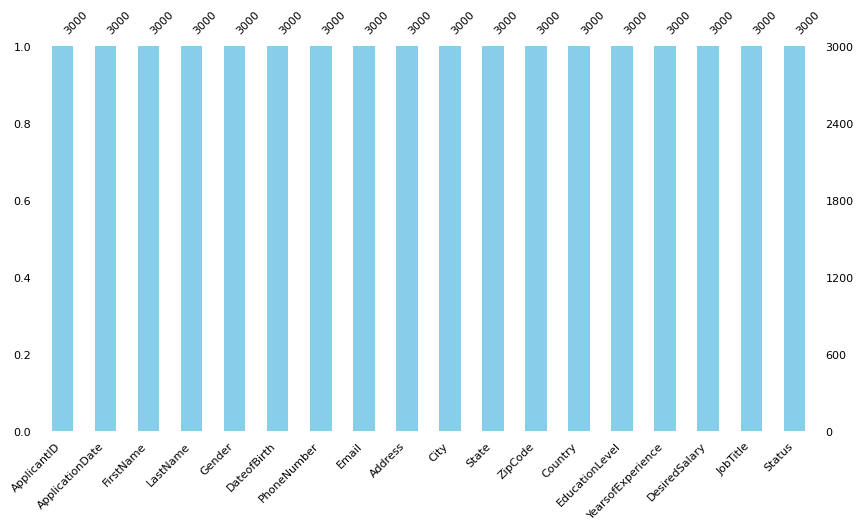

In [71]:
# Visualizing missing data
msno.bar(recruit_df, color='skyblue', figsize=(10, 5), fontsize=8)
plt.show()

### Visualization of Raw Data

In [72]:
# Check unique values in each column
for col in recruit_df.columns:
    unique_vals = recruit_df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals}\n")

Column: ApplicantID
Unique values (3000): [1001 1002 1003 ... 3998 3999 4000]

Column: ApplicationDate
Unique values (92): ['03-Jun-23' '15-May-23' '04-Aug-23' '28-Jul-23' '05-Jun-23' '26-Jul-23'
 '09-Jun-23' '15-Jul-23' '16-Jun-23' '25-May-23' '14-May-23' '04-Jun-23'
 '23-Jul-23' '12-Jun-23' '04-Jul-23' '16-May-23' '26-Jun-23' '23-May-23'
 '03-Jul-23' '03-Aug-23' '08-May-23' '25-Jun-23' '31-May-23' '07-Jul-23'
 '22-Jun-23' '01-Aug-23' '15-Jun-23' '06-Jul-23' '27-Jul-23' '02-Jun-23'
 '30-May-23' '14-Jul-23' '09-May-23' '18-May-23' '18-Jul-23' '10-May-23'
 '21-Jun-23' '30-Jul-23' '24-May-23' '28-May-23' '22-May-23' '24-Jun-23'
 '07-Jun-23' '11-Jun-23' '14-Jun-23' '29-Jun-23' '11-May-23' '13-May-23'
 '27-May-23' '05-Aug-23' '09-Jul-23' '12-Jul-23' '08-Jul-23' '17-Jul-23'
 '28-Jun-23' '13-Jun-23' '02-Jul-23' '27-Jun-23' '20-May-23' '25-Jul-23'
 '02-Aug-23' '20-Jul-23' '13-Jul-23' '19-Jun-23' '05-Jul-23' '08-Jun-23'
 '10-Jul-23' '16-Jul-23' '23-Jun-23' '19-May-23' '29-Jul-23' '19-Jul-23'
 

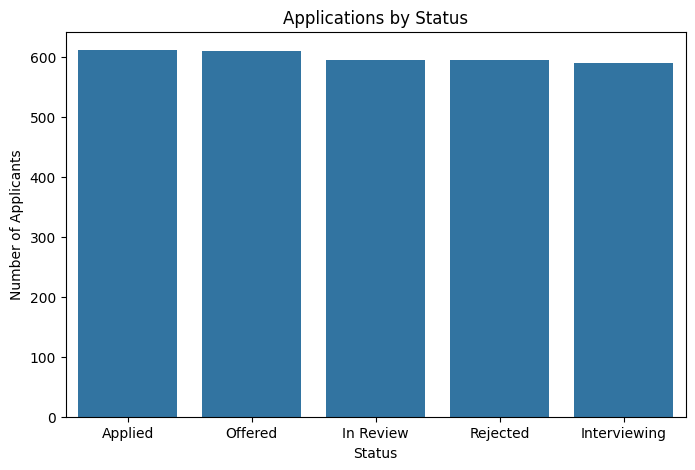

In [73]:
# Applications by Status
plt.figure(figsize=(8,5))
sns.countplot(data=recruit_df, x='Status', order=recruit_df['Status'].value_counts().index)
plt.title("Applications by Status")
plt.ylabel("Number of Applicants")
plt.show()

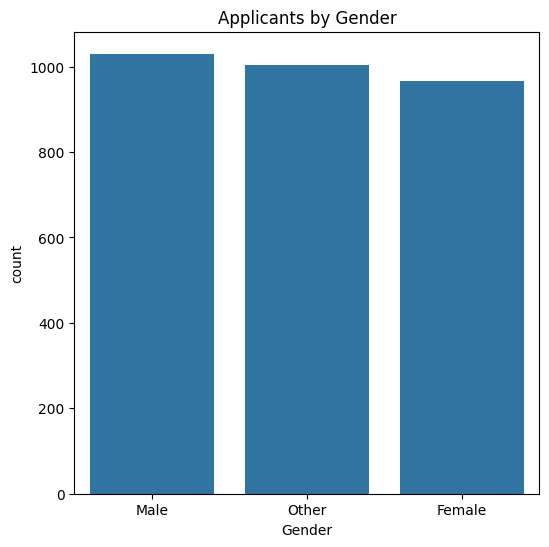

In [74]:
# Gender Distribution 
plt.figure(figsize=(6,6))
sns.countplot(data=recruit_df, x='Gender', order=recruit_df['Gender'].value_counts().index)
plt.title("Applicants by Gender")
plt.show()

### Data Cleaning

In [75]:
clean_recruit = recruit_df.copy()

In [76]:
# Trim whitespace 
clean_recruit = clean_recruit.applymap(lambda x: x.strip() if isinstance(x, str) else x)

clean_recruit.head()

,ApplicantID,ApplicationDate,FirstName,LastName,Gender,DateofBirth,PhoneNumber,Email,Address,City,State,ZipCode,Country,EducationLevel,YearsofExperience,DesiredSalary,JobTitle,Status
0,1001,03-Jun-23,Scott,Sheppard,Male,31-08-1992,421-429-7655x39421,perezjanet@example.org,597 Smith Point,Hollandfort,NV,57588,Micronesia,High School,8,60103.21,Chief Technology Officer,Interviewing
1,1002,15-May-23,Stanley,Lewis,Male,29-04-1965,+1-451-574-5308x1681,grossmark@example.com,8116 Stuart Loop,Port Margaretfurt,TN,14726,Greenland,Bachelor's Degree,17,64575.84,"Designer, furniture",Rejected
2,1003,04-Aug-23,Javier,Li,Female,10-03-1973,(858)901-5499,katiemaldonado@example.com,5940 Barr Villages Suite 075,Dianaland,TX,4699,China,PhD,20,39422.71,"Sound technician, broadcasting/film/video",Rejected
3,1004,28-Jul-23,Christopher,Johnston,Other,04-04-2001,(853)681-1839x2010,sheila73@example.com,442 Lewis Mount,Youngfurt,GA,34455,Ghana,High School,8,51045.11,Air cabin crew,Rejected
4,1005,05-Jun-23,Melissa,Hicks,Other,17-06-1978,364-575-8478x67812,emilypatterson@example.org,95961 Taylor Circles Apt. 169,East Ashleyborough,IN,21014,Solomon Islands,Master's Degree,0,52792.86,Art therapist,Interviewing


In [77]:
# Parse Date data
clean_recruit['DateofBirth'] = pd.to_datetime(clean_recruit['DateofBirth'], dayfirst=True, errors='coerce')
clean_recruit['ApplicationDate'] = pd.to_datetime(clean_recruit['ApplicationDate'], dayfirst=True, errors='coerce')

clean_recruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ApplicantID        3000 non-null   int64         
 1   ApplicationDate    3000 non-null   datetime64[ns]
 2   FirstName          3000 non-null   object        
 3   LastName           3000 non-null   object        
 4   Gender             3000 non-null   object        
 5   DateofBirth        3000 non-null   datetime64[ns]
 6   PhoneNumber        3000 non-null   object        
 7   Email              3000 non-null   object        
 8   Address            3000 non-null   object        
 9   City               3000 non-null   object        
 10  State              3000 non-null   object        
 11  ZipCode            3000 non-null   int64         
 12  Country            3000 non-null   object        
 13  EducationLevel     3000 non-null   object        
 14  YearsofE

In [78]:
# Clean phone number
def basic_clean_phone(phone):
    if pd.isna(phone):
        return np.nan

    phone = str(phone).strip()
    
    # Remove entries that are just ####
    if all(c == '#' for c in phone):
        return np.nan
    
    phone = phone.replace('.', '-').replace(')', '-')
    phone = ''.join(c for c in phone if c.isdigit() or c in ['+', 'x', '-', ' '])
    phone = phone.replace('x', ' ext.')
    
    return phone

clean_recruit['PhoneNumber'] = clean_recruit['PhoneNumber'].apply(basic_clean_phone)
clean_recruit['PhoneNumber']

0          421-429-7655 ext.39421
1        +1-451-574-5308 ext.1681
2                    858-901-5499
3           853-681-1839 ext.2010
4          364-575-8478 ext.67812
                  ...            
2995    001-324-747-3549 ext.4392
2996       870-454-9481 ext.49987
2997             001-847-873-3665
2998       385-467-6434 ext.67311
2999                 772-767-2580
Name: PhoneNumber, Length: 3000, dtype: object

In [79]:
# clean email

def clean_email(email):
    if pd.isna(email):
        return np.nan

    email = str(email).strip()

    # Use simple regex
    pattern = r'^[\w\.-]+@[\w\.-]+\.\w+$'
    if re.match(pattern, email):
        return email
    else:
        return np.nan
    
clean_recruit['Email'] = clean_recruit['Email'].apply(clean_email)
clean_recruit['Email']

0           perezjanet@example.org
1            grossmark@example.com
2       katiemaldonado@example.com
3             sheila73@example.com
4       emilypatterson@example.org
                   ...            
2995       davisvickie@example.org
2996         gpeterson@example.net
2997          bschultz@example.net
2998    alvarezstephen@example.net
2999     murrayallison@example.com
Name: Email, Length: 3000, dtype: object

In [80]:
# Clean country

import pycountry

def clean_country(country_name):
    if pd.isna(country_name):
        return np.nan
    
    country_name = str(country_name).strip()
    
    try:
        # Try to match by name
        country = pycountry.countries.lookup(country_name)
        return country.name  # Standardized name
    except LookupError:
        return np.nan  

clean_recruit['Country'] = clean_recruit['Country'].apply(clean_country)
clean_recruit['Country'].unique()

array([nan, 'Greenland', 'China', 'Ghana', 'Solomon Islands', 'Liberia',
       'Congo', 'Spain', 'Gabon', 'Switzerland', 'Guam',
       'Central African Republic', 'Kenya', 'Belize', 'Morocco', 'Poland',
       'Ukraine', 'Costa Rica', 'United Arab Emirates', 'Kyrgyzstan',
       'Belgium', 'Saint Kitts and Nevis', 'Norway', 'Iceland', 'Macao',
       'Comoros', 'Tunisia', 'Burkina Faso', 'Bahrain', 'Anguilla',
       'Canada', 'Nauru', 'Jordan', 'Niger', 'Hong Kong', 'Luxembourg',
       'Afghanistan', 'Holy See (Vatican City State)', 'Monaco',
       'Marshall Islands', 'Faroe Islands', 'Niue', 'San Marino', 'Cuba',
       'Colombia', 'Sweden', 'Western Sahara', 'Pakistan', 'Malaysia',
       'Palau', 'Greece', 'French Guiana', 'Egypt', 'Uzbekistan',
       'Argentina', 'Paraguay', 'Mauritania', 'Cyprus', 'Cambodia',
       'Hungary', 'Botswana', 'Kiribati', 'Estonia', 'Ethiopia', 'Yemen',
       'Bolivia, Plurinational State of', 'Mayotte', 'Turkmenistan',
       'Georgia', 'France

In [81]:
# Use NLP on job title for clustering
# !python -m spacy download en_core_web_sm

# Load model
nlp = spacy.load("en_core_web_sm")

# Remove Stopwords for job titles
job_stopwords = set([
    "senior", "junior", "assistant", "lead", "principal", "intern", "trainee"
])

def clean_jobtitle_advanced(title):
    if pd.isna(title):
        return ""
    
    title = title.lower()
    title = re.sub(r'[^\w\s]', '  ', title)
    
    # Tokenize with spaCy
    doc = nlp(title)
    tokens = []
    for token in doc:
        if token.text in job_stopwords:
            continue  # remove stopwords
        lemma = token.lemma_  # lemmatize
        tokens.append(lemma)
    
    return " ".join(tokens)

clean_recruit['JobTitle'] = clean_recruit['JobTitle'].apply(clean_jobtitle_advanced)
clean_recruit['JobTitle']


0                              chief technology officer
1                                 designer    furniture
2       sound technician    broadcasting   film   video
3                                        air cabin crew
4                                         art therapist
                             ...                       
2995                           psychologist    forensic
2996                      operational investment banker
2997                                 petroleum engineer
2998                          housing manager   officer
2999                           loss adjuster    charter
Name: JobTitle, Length: 3000, dtype: object

In [82]:
clean_recruit.to_csv('data/cleaned_recruitment_data.csv', index=False)

## Engagement Data

In [83]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EmployeeID            3000 non-null   int64 
 1   SurveyDate            3000 non-null   object
 2   EngagementScore       3000 non-null   int64 
 3   SatisfactionScore     3000 non-null   int64 
 4   WorkLifeBalanceScore  3000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 117.3+ KB


In [84]:
# Parse date data
engagement_df['SurveyDate'] = pd.to_datetime(engagement_df['SurveyDate'], dayfirst=True, errors='coerce')
engagement_df.head()

,EmployeeID,SurveyDate,EngagementScore,SatisfactionScore,WorkLifeBalanceScore
0,1001,2022-10-10,2,5,5
1,1002,2023-08-03,4,5,3
2,1003,2023-01-03,2,5,2
3,1004,2023-07-30,3,5,3
4,1005,2023-06-19,2,4,5


In [85]:
# Check duplicate
dup_engagement = engagement_df[engagement_df.duplicated('EmployeeID', keep=False)]
print(f"Number of duplicated EmpID rows: {len(dup_engagement)}")


Number of duplicated EmpID rows: 0


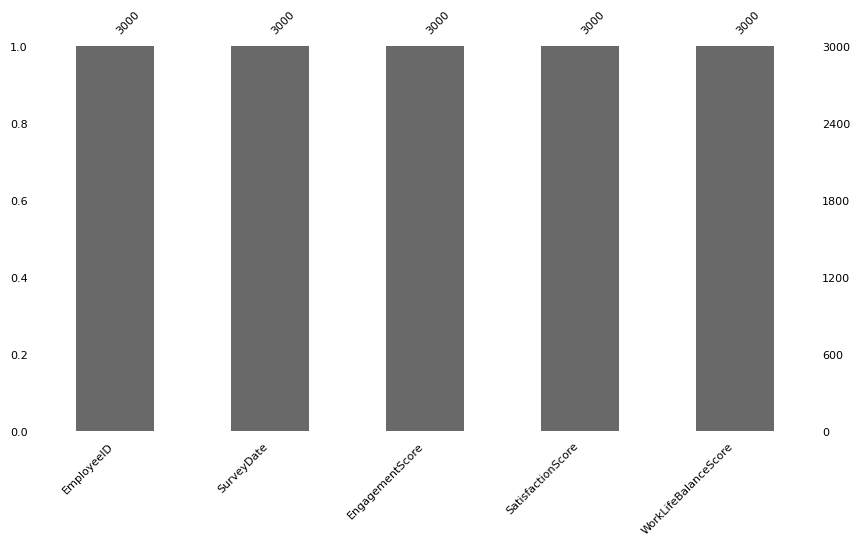

In [86]:
# Check missing data 
msno.bar(engagement_df, figsize=(10, 5), fontsize=8)
plt.show()

## Training and Development Data

In [88]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EmployeeID            3000 non-null   int64  
 1   TrainingDate          3000 non-null   object 
 2   TrainingProgramName   3000 non-null   object 
 3   TrainingType          3000 non-null   object 
 4   TrainingOutcome       3000 non-null   object 
 5   Location              3000 non-null   object 
 6   Trainer               3000 non-null   object 
 7   TrainingDurationDays  3000 non-null   int64  
 8   TrainingCost          3000 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 211.1+ KB


In [89]:
# Check duplicate
dup_training = training_df[training_df.duplicated('EmployeeID', keep=False)]
print(f"Number of duplicated EmpID rows: {len(dup_training)}")

Number of duplicated EmpID rows: 0


In [91]:
# Parse date data
training_df['TrainingDate'] = pd.to_datetime(training_df['TrainingDate'], dayfirst=True, errors='coerce')
training_df.head()

,EmployeeID,TrainingDate,TrainingProgramName,TrainingType,TrainingOutcome,Location,Trainer,TrainingDurationDays,TrainingCost
0,1001,2022-09-21,Customer Service,Internal,Failed,Port Greg,Amanda Daniels,4,510.83
1,1002,2023-07-19,Leadership Development,Internal,Failed,Brandonview,Brittany Chambers,2,582.37
2,1003,2023-02-24,Technical Skills,Internal,Incomplete,Port Briannahaven,Mark Roberson,4,777.06
3,1004,2023-01-12,Customer Service,Internal,Completed,Knightborough,Richard Fisher,2,824.30
4,1005,2023-05-12,Communication Skills,External,Passed,Bruceshire,Heather Shaffer,4,145.99


In [92]:
# Check unique values in each column
for col in training_df.columns:
    unique_vals = training_df[col].unique()
    print(f"Column: {col}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals}\n")
    

Column: EmployeeID
Unique values (3000): [1001 1002 1003 ... 3998 3999 4000]

Column: TrainingDate
Unique values (366): <DatetimeArray>
['2022-09-21 00:00:00', '2023-07-19 00:00:00', '2023-02-24 00:00:00',
 '2023-01-12 00:00:00', '2023-05-12 00:00:00', '2023-05-08 00:00:00',
 '2023-05-14 00:00:00', '2023-08-02 00:00:00', '2022-08-21 00:00:00',
 '2022-08-19 00:00:00',
 ...
 '2022-10-29 00:00:00', '2022-08-27 00:00:00', '2023-02-12 00:00:00',
 '2023-02-07 00:00:00', '2022-12-18 00:00:00', '2022-10-28 00:00:00',
 '2022-08-28 00:00:00', '2023-07-12 00:00:00', '2023-07-11 00:00:00',
 '2023-01-22 00:00:00']
Length: 366, dtype: datetime64[ns]

Column: TrainingProgramName
Unique values (5): ['Customer Service' 'Leadership Development' 'Technical Skills'
 'Communication Skills' 'Project Management']

Column: TrainingType
Unique values (2): ['Internal' 'External']

Column: TrainingOutcome
Unique values (4): ['Failed' 'Incomplete' 'Completed' 'Passed']

Column: Location
Unique values (2738): ['Po